# Clustering
This script requires a distance and a connectivity matrix generated by a code clone detector.

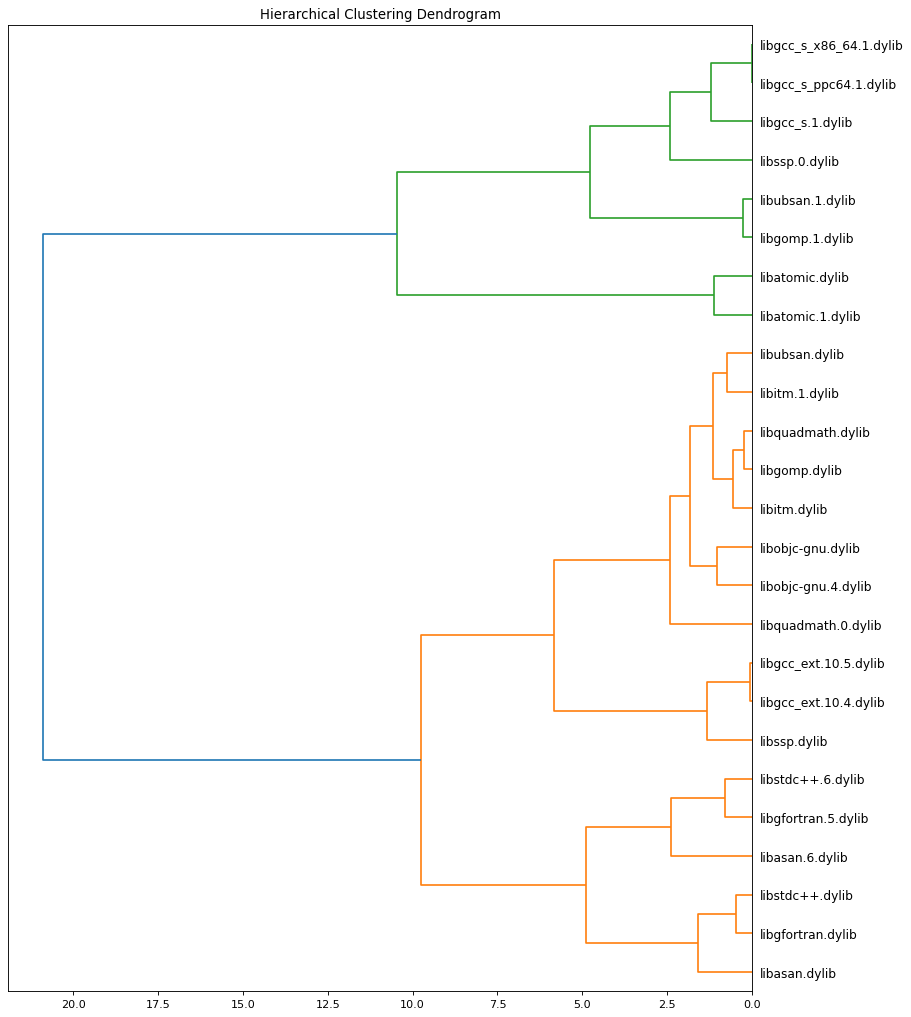

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

figure(num=None, figsize=(12, 16), dpi=80, facecolor='w', edgecolor='k')

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


if __name__ == "__main__":
    df_dist = pd.read_csv('../../code-clone-experiments/gcc-dylib-distance.csv')
    files = df_dist.columns[:-1]
    matrix = df_dist.values[0:-1, 0:-1]
    file_names = [file.split('/')[-1] for file in files]
    
    df_conn = pd.read_csv('../../code-clone-experiments/gcc-dylib-connectivity.csv')
    connectivity = df_conn.values[:, 0:-1]

    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, connectivity=connectivity, 
                                    linkage='ward').fit(matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(model, labels=file_names, orientation='left', leaf_font_size=11)
#     plt.ylabel("Number of points in node (or index of point if no parenthesis).")
    plt.savefig('tree.pdf')
    plt.show()